In [12]:
p = 1/2 + sqrt(5)/2 #the golden ratio

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def to_base11(num):
    chars = ["0","1","2","3","4","5","6","7","8","9","A"]
    out = ""
    for i in [3,2,1,0]:
        out+=chars[num//(11**i)]
        num=num%(11**i)
    return out

In [5]:
def draw_inner_collapsed(nx,ny,xmax,ymax):
    x = np.linspace(0,xmax,nx)
    x += 0.5
    y = np.linspace(0,ymax,ny)
    y+=0.5
    ints = np.zeros((len(x),len(y)),dtype=np.int16)
    numcodes = 0
    codes = {}
    for i in range(len(y)):
        for j in range(len(x)):
            val = torus_to_code_sw(*plane_to_torus(x[j]-0.5,y[i]-0.5))+11*torus_to_code_se(*plane_to_torus(x[j]+0.5,y[i]-0.5))+121*torus_to_code_ne(*plane_to_torus(x[j]+0.5,y[i]+0.5))+1331*torus_to_code_nw(*plane_to_torus(x[j]-0.5,y[i]+0.5))
            if val not in codes:
                numcodes+=1
                codes[val]=numcodes
#             print(codes)
#             print(val)
            ints[i,j] = codes[val]
    im = ints/np.max(ints)
    im = np.flip(im,0)
    #plt.imshow(im,cmap='plasma')
    return ints

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def to_base11(num):
    chars = ["0","1","2","3","4","5","6","7","8","9","A"]
    out = ""
    for i in [3,2,1,0]:
        out+=chars[num//(11**i)]
        num=num%(11**i)
    return out

In [13]:
def plane_to_torus(m,n):
    r"""
    This function inputs a point in R^2 and takes its modulus over the torus constructed in [Lab2019].
    
    EXAMPLES::

        sage: from slabbe.jeandel_rao import plane_to_torus
        sage: plane_to_torus(0, 0)                       # abs tol 1e-10
        (0.000000000000000, 0.0)
        sage: plane_to_torus(0.324, .324)                # abs tol 1e-10
        (0.324000000000000, 0.324)
        sage: plane_to_torus(12.324, 12.324)             # abs tol 1e-10
        (0.615796067500630, 3.08793202250021)
        sage: plane_to_torus(100, 100)                   # abs tol 1e-10
        (1.3343685400050447, 3.021286236252207)

    """
    phi = .5 + .5 * math.sqrt(5)
    m = float(m)
    n = float(n)
    h = n // float(phi + 3)
    return (m - h) % float(phi), n % float(phi+3)

def torus_to_code(x,y):
    r"""
    Return in which atom of the partition associated to Jeandel-Rao tilings
    the point (x,y) falls in according to [Lab2019]_.

    EXAMPLES::

        sage: from slabbe.jeandel_rao import torus_to_code
        sage: torus_to_code(0,0)
        0
        sage: torus_to_code(0.23,3.5)
        5
        sage: torus_to_code(1.23,2.243)
        3

    ::

        sage: from slabbe.jeandel_rao import plane_to_torus, random_torus_point
        sage: torus_to_code(*plane_to_torus(14.4141, 89.14))
        9
        sage: torus_to_code(*random_torus_point())                  # random
        3

    """
    phi = .5 + .5 * math.sqrt(5)
    assert x >= 0, "x(={}) must be nonnegative".format(x)
    assert y >= 0, "y(={}) must be nonnegative".format(y)
    assert x < phi, "x(={}) must be less then phi".format(x)
    assert y < phi+3, "y(={}) must be less then phi+3".format(y)
    # test
    if y < 1:
        if x < (1./phi):
            if y <= phi*x:
                return 0
            else:
                return 1
        elif x < 1:
            if y <= (phi**2)*x -phi:
                return 0
            else:
                return 1
        else:
            if y <= phi*x - phi:
                return 0
            else:
                return 1
    if y <= phi*x + 1:
        if x <= 1./phi:
            return 9
        else:
            if y <= (phi**2)*x + 1 - phi:
                if x >= (1./phi) and x < 1:
                    return 9
                elif x >= 1:
                    if y <= phi*x + 1 - phi:
                        return 9
                    else:
                        return 3
            else:
                return 8
    if y > (phi*x + 1) and y <= phi*x + 2:
        if x <= 1:
            if y <= (phi**2)*x + 1:
                return 10
            else:
                return 7
        else:
            return 7
    if y > phi*x +2:
        if x <= 1:
            if y <= (phi**2)*x + 2:
                return 4
            if y <= (phi*x + phi +1) and y > (phi**2)*x + 2:
                return 2
            else:
                if y > (phi**2)*x + phi + 2:
                    return 6
                if y > (phi*x + 3) and x > (1./(phi**2)):
                    return 6
                else:
                    return 5
        else:
            return 6
        
def torus_to_code_sw(x,y):
    r"""
    This version of torus_to_code treats any two Wang tiles with the same top and left corners as equivalent. 
    Namely, 4~7 and 3~9
    """
    phi = .5 + .5 * math.sqrt(5)
    assert x >= 0, "x(={}) must be nonnegative".format(x)
    assert y >= 0, "y(={}) must be nonnegative".format(y)
    assert x < phi, "x(={}) must be less then phi".format(x)
    assert y < phi+3, "y(={}) must be less then phi+3".format(y)
    # test
    if y < 1:
        if x < (1./phi):
            if y <= phi*x:
                return 0
            else:
                return 1
        elif x < 1:
            if y <= (phi**2)*x -phi:
                return 0
            else:
                return 1
        else:
            if y <= phi*x - phi:
                return 0
            else:
                return 1
    if y <= phi*x + 1:
        if x <= 1./phi:
            return 9
        else:
            if y <= (phi**2)*x + 1 - phi:
                if x >= (1./phi) and x < 1:
                    return 9
                elif x >= 1:
                    if y <= phi*x + 1 - phi:
                        return 9
                    else:
                        return 9
            else:
                return 8
    if y > (phi*x + 1) and y <= phi*x + 2:
        if x <= 1:
            if y <= (phi**2)*x + 1:
                return 10
            else:
                return 7
        else:
            return 7
    if y > phi*x +2:
        if x <= 1:
            if y <= (phi**2)*x + 2:
                return 7
            if y <= (phi*x + phi +1) and y > (phi**2)*x + 2:
                return 2
            else:
                if y > (phi**2)*x + phi + 2:
                    return 6
                if y > (phi*x + 3) and x > (1./(phi**2)):
                    return 6
                else:
                    return 5
        else:
            return 6
        
def torus_to_code_nw(x,y):

    r"""
    This version of torus_to_code treats any two Wang tiles with the same bottom and left corners as equivalent. 
    Namely, 5~6 and 7~10
    """
    
    phi = .5 + .5 * math.sqrt(5)
    assert x >= 0, "x(={}) must be nonnegative".format(x)
    assert y >= 0, "y(={}) must be nonnegative".format(y)
    assert x < phi, "x(={}) must be less then phi".format(x)
    assert y < phi+3, "y(={}) must be less then phi+3".format(y)
    # test
    if y < 1:
        if x < (1./phi):
            if y <= phi*x:
                return 0
            else:
                return 1
        elif x < 1:
            if y <= (phi**2)*x -phi:
                return 0
            else:
                return 1
        else:
            if y <= phi*x - phi:
                return 0
            else:
                return 1
    if y <= phi*x + 1:
        if x <= 1./phi:
            return 9
        else:
            if y <= (phi**2)*x + 1 - phi:
                if x >= (1./phi) and x < 1:
                    return 9
                elif x >= 1:
                    if y <= phi*x + 1 - phi:
                        return 9
                    else:
                        return 3
            else:
                return 8
    if y > (phi*x + 1) and y <= phi*x + 2:
        if x <= 1:
            if y <= (phi**2)*x + 1:
                return 10
            else:
                return 10
        else:
            return 10
    if y > phi*x +2:
        if x <= 1:
            if y <= (phi**2)*x + 2:
                return 4
            if y <= (phi*x + phi +1) and y > (phi**2)*x + 2:
                return 2
            else:
                if y > (phi**2)*x + phi + 2:
                    return 6
                if y > (phi*x + 3) and x > (1./(phi**2)):
                    return 6
                else:
                    return 6
        else:
            return 6

def torus_to_code_ne(x,y):
    r"""
    This version of torus_to_code treats any two Wang tiles with the same bottom and right corners as equivalent. 
    Namely, 2~5 and 8~10
    """

    phi = .5 + .5 * math.sqrt(5)
    assert x >= 0, "x(={}) must be nonnegative".format(x)
    assert y >= 0, "y(={}) must be nonnegative".format(y)
    assert x < phi, "x(={}) must be less then phi".format(x)
    assert y < phi+3, "y(={}) must be less then phi+3".format(y)
    # test
    if y < 1:
        if x < (1./phi):
            if y <= phi*x:
                return 0
            else:
                return 1
        elif x < 1:
            if y <= (phi**2)*x -phi:
                return 0
            else:
                return 1
        else:
            if y <= phi*x - phi:
                return 0
            else:
                return 1
    if y <= phi*x + 1:
        if x <= 1./phi:
            return 9
        else:
            if y <= (phi**2)*x + 1 - phi:
                if x >= (1./phi) and x < 1:
                    return 9
                elif x >= 1:
                    if y <= phi*x + 1 - phi:
                        return 9
                    else:
                        return 3
            else:
                return 10
    if y > (phi*x + 1) and y <= phi*x + 2:
        if x <= 1:
            if y <= (phi**2)*x + 1:
                return 10
            else:
                return 7
        else:
            return 7
    if y > phi*x +2:
        if x <= 1:
            if y <= (phi**2)*x + 2:
                return 4
            if y <= (phi*x + phi +1) and y > (phi**2)*x + 2:
                return 5
            else:
                if y > (phi**2)*x + phi + 2:
                    return 6
                if y > (phi*x + 3) and x > (1./(phi**2)):
                    return 6
                else:
                    return 5
        else:
            return 6
        
def torus_to_code_se(x,y):
    r"""
    This version of torus_to_code treats any two Wang tiles with the same top and right corners as equivalent. 
    Namely, 2~4~5 and 8~9
    """

    phi = .5 + .5 * math.sqrt(5)
    assert x >= 0, "x(={}) must be nonnegative".format(x)
    assert y >= 0, "y(={}) must be nonnegative".format(y)
    assert x < phi, "x(={}) must be less then phi".format(x)
    assert y < phi+3, "y(={}) must be less then phi+3".format(y)
    # test
    if y < 1:
        if x < (1./phi):
            if y <= phi*x:
                return 0
            else:
                return 1
        elif x < 1:
            if y <= (phi**2)*x -phi:
                return 0
            else:
                return 1
        else:
            if y <= phi*x - phi:
                return 0
            else:
                return 1
    if y <= phi*x + 1:
        if x <= 1./phi:
            return 9
        else:
            if y <= (phi**2)*x + 1 - phi:
                if x >= (1./phi) and x < 1:
                    return 9
                elif x >= 1:
                    if y <= phi*x + 1 - phi:
                        return 9
                    else:
                        return 3
            else:
                return 9
    if y > (phi*x + 1) and y <= phi*x + 2:
        if x <= 1:
            if y <= (phi**2)*x + 1:
                return 10
            else:
                return 7
        else:
            return 7
    if y > phi*x +2:
        if x <= 1:
            if y <= (phi**2)*x + 2:
                return 5
            if y <= (phi*x + phi +1) and y > (phi**2)*x + 2:
                return 5
            else:
                if y > (phi**2)*x + phi + 2:
                    return 6
                if y > (phi*x + 3) and x > (1./(phi**2)):
                    return 6
                else:
                    return 5
        else:
            return 6

In [7]:
def draw_inner(nx,ny,xmax,ymax):
    r"""
    This function categorizes distinct 'types' of vertices in the Jeandel-Rao Wang Tiling on
    a 2-dimensional interval from 0 to xmax and 0 to ymax.
    The values nx and ny determine how finely this interval is partitioned.
    """
    
    #parititioning the interval
    x = np.linspace(0,xmax,nx)
    x += 0.5
    y = np.linspace(0,ymax,ny) 
    y+=0.5
    
    #defining a matrix to store results
    ints = np.zeros((len(x),len(y)),dtype=np.int16)
    
    #codes holds a label for each unique vertex type
    numcodes = 0
    codes = {}
    
    for i in range(len(y)):
        for j in range(len(x)):
            #finding the four tiles adjacent to any vertex and assigning a values to unqiue configurations 
            val = torus_to_code(*plane_to_torus(x[j]-0.5,y[i]-0.5))+11*torus_to_code(*plane_to_torus(x[j]+0.5,y[i]-0.5))+121*torus_to_code(*plane_to_torus(x[j]+0.5,y[i]+0.5))+1331*torus_to_code(*plane_to_torus(x[j]-0.5,y[i]+0.5))
            #assigning a unique code to each unique element of val and storing in ints
            if val not in codes:
                numcodes+=1
                codes[val]=numcodes
#             print(codes)
#             print(val)
            ints[i,j] = codes[val]
    
    #normalizing and reorienting results
    im = ints/np.max(ints)
    im = np.flip(im,0)
    #plt.imshow(im,cmap='plasma')
    return ints

In [14]:
def draw_inner_collapsed(nx,ny,xmax,ymax):
    r"""
    This version of draw_inner takes as equivalent any tiles whose adjacent edges to the sampled vertex are the same.
    See: torus_to_code_sw, torus_to_code_se, etc.
    """
    
    x = np.linspace(0,xmax,nx)
    x += 0.5
    y = np.linspace(0,ymax,ny)
    y+=0.5
    ints = np.zeros((len(x),len(y)),dtype=np.int16)
    numcodes = 0
    codes = {}
    for i in range(len(y)):
        for j in range(len(x)):
            val = torus_to_code_sw(*plane_to_torus(x[j]-0.5,y[i]-0.5))+11*torus_to_code_se(*plane_to_torus(x[j]+0.5,y[i]-0.5))+121*torus_to_code_ne(*plane_to_torus(x[j]+0.5,y[i]+0.5))+1331*torus_to_code_nw(*plane_to_torus(x[j]-0.5,y[i]+0.5))
            if val not in codes:
                numcodes+=1
                codes[val]=numcodes
#             print(codes)
#             print(val)
            ints[i,j] = codes[val]
    im = ints/np.max(ints)
    im = np.flip(im,0)
    #plt.imshow(im,cmap='plasma')
    return ints

27


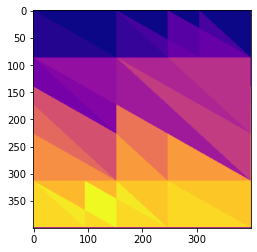

In [8]:
ints = draw_inner_collapsed(400,400,n(p),3+n(p))
print(len(np.unique(ints)))
plt.imshow(ints/np.max(ints),cmap='plasma')
#ints = draw_inner(400,400,n(p),(3+n(p)))

In [9]:
plt.imsave('projection_collapsed2.png', ints/np.max(ints), cmap='plasma')

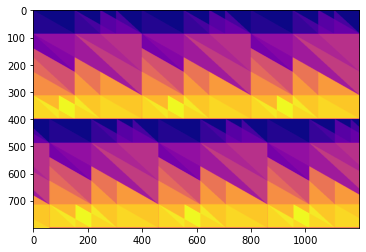

In [10]:
gah = ints
gah = np.concatenate((gah,gah,gah),axis=1)
gah = np.concatenate((gah,np.roll(gah,61)),axis=0)
gah = gah/np.max(gah)
plt.imshow(gah,cmap="plasma")

In [11]:
codes = [to_base11(i) for i in np.unique(ints)]